In [ ]:
import os
import re
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch 

In [ ]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
data= pd.read_csv('/drive/MyDrive/sentiment-cnn/preprocessed_data_semeval700000.csv', on_bad_lines='skip')
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2,3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,0,1,2,3,4,5
0,0.0,1.467998e+09,Mon Apr 06 23:11:14 PDT 2009,NO_QUERY,sexygrneyes,cool tweet app razr
1,0.0,2.300049e+09,Tue Jun 23 13:40:11 PDT 2009,NO_QUERY,sammydearr,know famili drama lame hey next time hang kim ...
2,0.0,1.993474e+09,Mon Jun 01 10:26:07 PDT 2009,NO_QUERY,Lamb_Leanne,school email not open geographi stuff revis st...
3,0.0,2.256551e+09,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,yogicerdito,upper airway problem
4,0.0,2.052380e+09,Sat Jun 06 00:32:16 PDT 2009,NO_QUERY,Yengching,go miss pastor sermon faith


In [ ]:
data = data.drop('2', 1)
data = data.drop('3', 1)
data = data.drop('4', 1)
data = data.drop('1', 1)
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


,0,5
0,0.0,cool tweet app razr
1,0.0,know famili drama lame hey next time hang kim ...
2,0.0,school email not open geographi stuff revis st...
3,0.0,upper airway problem
4,0.0,go miss pastor sermon faith


In [ ]:
data=data.rename(columns = {'0':'label','1':'id','5':'tweet'})
data.head()
data=data.dropna()

data.head()

,label,tweet
0,0.0,cool tweet app razr
1,0.0,know famili drama lame hey next time hang kim ...
2,0.0,school email not open geographi stuff revis st...
3,0.0,upper airway problem
4,0.0,go miss pastor sermon faith


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Train-Test Split
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.3, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create feature vectors
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors = vectorizer.fit_transform(train['tweet'].values.astype('U'))
test_vectors = vectorizer.transform(test['tweet'].values.astype('U'))


In [ ]:

from sklearn import svm
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import f1_score
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
classifier_linear.fit(train_vectors, train['label'])
prediction_linear = classifier_linear.predict(test_vectors)
# results
print("Accuracy:",metrics.accuracy_score(test["label"], prediction_linear))


Accuracy: 0.7741528676389955


F1 score 0.7790433616450603


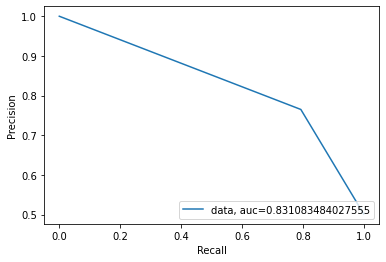

In [ ]:
# Precision/recall curve
print("F1 score",metrics.f1_score(test["label"], prediction_linear, pos_label=4.0))
prec, rec, _ = metrics.precision_recall_curve(test["label"], prediction_linear, pos_label=4.0)
auc = metrics.auc(rec,prec)
plt.plot(rec,prec,label="data, auc="+str(auc))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc=4)
plt.show()